<a href="https://colab.research.google.com/github/jacr2006/android-tflitemodel-drowsiness-detection/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset usado https://ibug.doc.ic.ac.uk/resources/300-W/

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install xmltodict

In [0]:
import xmltodict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import cv2
from google.colab.patches import cv2_imshow

###**Datos**
Visualizacion inicial de los datos

In [0]:
PATH_DRIVE = '/content/drive/My Drive/Proyectos Nuevos/ML/multiclass_landmark_keras_cnn/ibug_300W_large_face_landmark_dataset/'
pathXml = PATH_DRIVE + 'labels_ibug_300W_train.xml'# archivo con los datos de entrenamiento
with open(pathXml, 'r') as file:
  dict = xmltodict.parse(file.read())# lectura del archivo xml y conversion a diccionario

In [0]:
IMG_NUM=2689
print( 'Path: '+\
      dict['dataset']['images']['image'][IMG_NUM]['@file'] )
print( 'Box: '+\
      dict['dataset']['images']['image'][IMG_NUM]['box']['@top']+','+\
      dict['dataset']['images']['image'][IMG_NUM]['box']['@left']+','+\
      dict['dataset']['images']['image'][IMG_NUM]['box']['@width']+','+\
      dict['dataset']['images']['image'][IMG_NUM]['box']['@height'])
print( 'Mark 0:'+\
      dict['dataset']['images']['image'][IMG_NUM]['box']['part'][0]['@name']+','+\
      dict['dataset']['images']['image'][IMG_NUM]['box']['part'][0]['@x']+','+\
      dict['dataset']['images']['image'][IMG_NUM]['box']['part'][0]['@y'])


Path: helen/trainset/2869939639_3.jpg
Box: 378,378,447,447
Mark 0:00,464,608


In [0]:
pathImg = dict['dataset']['images']['image'][IMG_NUM]['@file']
img=cv2.imread( PATH_DRIVE+pathImg )# lectura de la imagen de muestra

x=[]
y=[]
for i in range(68):
  x.append( int(dict['dataset']['images']['image'][IMG_NUM]['box']['part'][i]['@x']) )
  y.append( int(dict['dataset']['images']['image'][IMG_NUM]['box']['part'][i]['@y']) )

m=zip(x,y)
for (i, j) in m:
  cv2.circle(img, (i,j), 2, (0, 0, 255), -1)

left = int( dict['dataset']['images']['image'][IMG_NUM]['box']['@left'] )
top = int( dict['dataset']['images']['image'][IMG_NUM]['box']['@top'] )
width = int( dict['dataset']['images']['image'][IMG_NUM]['box']['@width'] )
height = int( dict['dataset']['images']['image'][IMG_NUM]['box']['@height'] )
cv2.rectangle( img, ( left, top ), ( (left + width), (top + height) ), (0, 0, 255), 2 )# dibujo del rectangulo sobre la imagen

#cv2_imshow(img)#imagen tamaño real

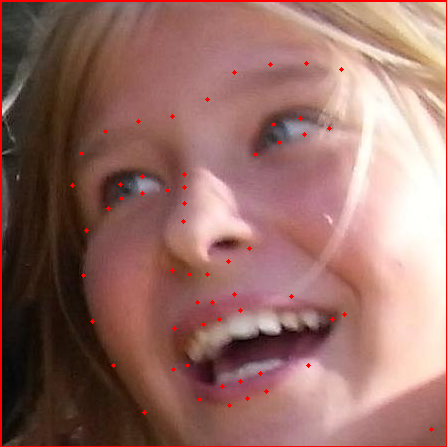

(1319, 1318, 3)


In [0]:
cropImg = img[top:top+height, left:left+width]# recorte de la imagen al tamaño de la region de interes (ROI)

xcrop=[]
ycrop=[]
for i in range(68):
  xcrop.append( x[i]-left )
  ycrop.append( y[i]-top )

mcrop=list(zip(xcrop,ycrop))

for (i, k) in mcrop:
  cv2.circle(cropImg, (i,j), 2, (0, 0, 255), -1)

cv2_imshow(cropImg)# ROI de la imagen
print(img.shape)